# Explore here

## Paso 1: Carga del conjunto de datos

In [1]:
!pip install missingno lazypredict 

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import joblib

In [3]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

df = pd.read_csv(url)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Me quedo con las variables Latitude, Longitude, MedInc 
df = df[['Latitude', 'Longitude', 'MedInc']]

## Paso 2: Construye un K-Means
#### Supongamos que ya tienes un DataFrame df con las tres columnas 'latitude', 'longitude', 'MedInc'


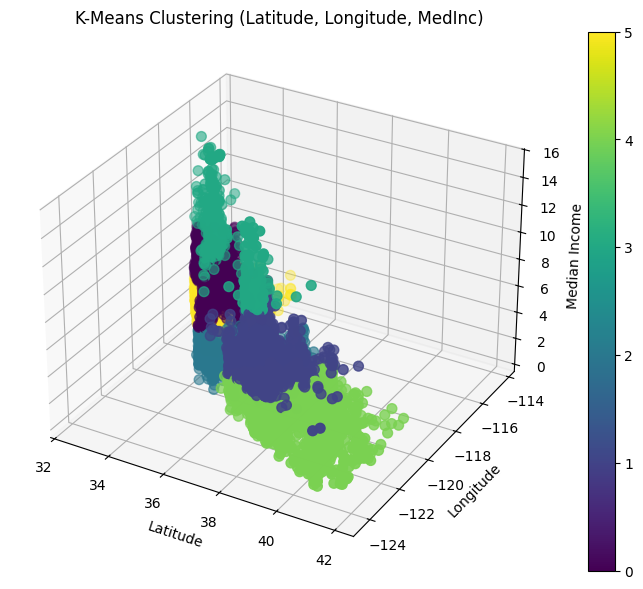

In [5]:
# Escalar los datos para que las variables tengan la misma magnitud
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Latitude', 'Longitude', 'MedInc']])


kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Crear un gráfico 3D para visualizar los clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos, coloreándolos según su cluster
scatter = ax.scatter(df['Latitude'], df['Longitude'], df['MedInc'], c=df['cluster'], cmap='viridis', s=50)

ax.set_title('K-Means Clustering (Latitude, Longitude, MedInc)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Median Income')

# Añadir una barra de color para indicar los clusters
fig.colorbar(scatter)

plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
 3   cluster    20640 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 564.5 KB


## Paso 3: Predice con el conjunto de test

In [7]:
X = df.drop(columns= ['cluster'])
y = df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

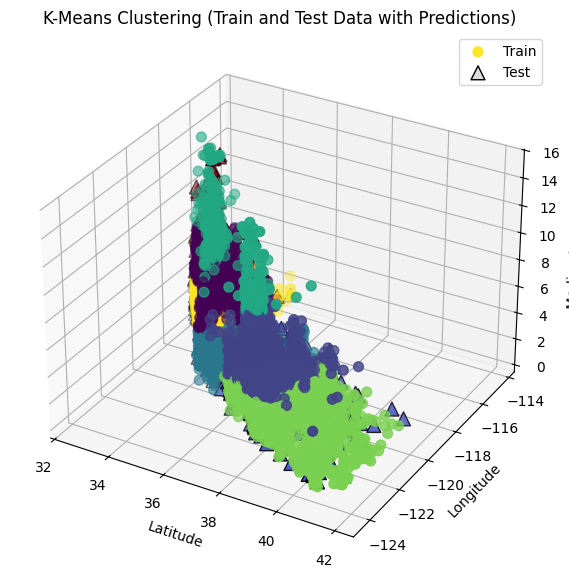

In [8]:
# Crear el modelo K-Means con el número deseado de clusters (3 en este caso)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Predecir los clusters en los datos de prueba
y_pred_test = kmeans.predict(X_test)

# Añadir la predicción al conjunto de prueba
X_test['predicted_cluster'] = y_pred_test

# Crear un gráfico 3D para visualizar los clusters en el conjunto de entrenamiento y prueba
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de entrenamiento
scatter_train = ax.scatter(X_train['Latitude'], X_train['Longitude'], X_train['MedInc'], c=y_train, cmap='viridis', s=50, label='Train')
# Graficar los puntos de prueba con las predicciones del modelo
scatter_test = ax.scatter(X_test['Latitude'], X_test['Longitude'], X_test['MedInc'], c=X_test['predicted_cluster'], cmap='coolwarm', s=100, edgecolor='k', marker='^', label='Test')

ax.set_title('K-Means Clustering (Train and Test Data with Predictions)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Median Income')

ax.legend()


plt.show()

## Paso 4: Entrena un modelo de clasificación supervisada

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Divido el df en train y test.
X = df.drop(columns=['cluster'])  # Utilizamos todas las características excepto 'cluster'
y = df['cluster']  # La variable de 'cluster' generada por K-Means se convierte en la etiqueta
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear un modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train_scaled, y_train)
# Realizar predicciones en los datos de prueba
y_pred_test = rf_model.predict(X_test_scaled)

# Evaluar el modelo utilizando métricas de clasificación
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_test))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.9951550387596899

Matriz de confusión:
 [[ 831    0    1    1    0    4]
 [   0  523    0    0    1    0]
 [   0    1  333    0    3    0]
 [   1    0    0  113    0    0]
 [   0    3    2    0  945    0]
 [   3    0    0    0    0 1363]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       837
           1       0.99      1.00      1.00       524
           2       0.99      0.99      0.99       337
           3       0.99      0.99      0.99       114
           4       1.00      0.99      1.00       950
           5       1.00      1.00      1.00      1366

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [10]:

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    specificity = tn / (tn + fp)
    return specificity


def get_metrics(y_train, y_test, y_pred_train, y_pred_test, y_proba_train, y_proba_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')  # Weighted average for multiclass
    train_auc = roc_auc_score(y_train, y_proba_train, multi_class='ovr')  # AUC for multiclass (one-vs-rest)
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    train_specificity = specificity_score(y_train, y_pred_train)
    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_auc = roc_auc_score(y_test, y_proba_test, multi_class='ovr')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_specificity = specificity_score(y_test, y_pred_test)
    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity
    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame(
        [[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],
         [test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],
         [diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
        columns=['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
        index=['Train', 'Test', 'Diferencia']
    )
    return metrics_df


y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

y_proba_train = rf_model.predict_proba(X_train_scaled)
y_proba_test = rf_model.predict_proba(X_test_scaled)
# Obtener las métricas
metrics_df = get_metrics(y_train, y_test, y_pred_train, y_pred_test, y_proba_train, y_proba_test)
print(metrics_df)

            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       1.000000  1.000000  1.000000   1.000000  1.000000          1.0
Test        0.995155  0.995154  0.999971   0.995156  0.995155          1.0
Diferencia  0.004845  0.004846  0.000029   0.004844  0.004845          0.0


## Paso 5: Guarda los modelos

In [11]:
carpeta_modelos = '/workspaces/Tutorial-K-Medias-Ana-beren/models'

# Define los nombres de los archivos 
modelo_rf = f'{carpeta_modelos}/modelo_rf.pkl'
modelo_kmeans = f'{carpeta_modelos}/modelo_kmeans.pkl'
# Guarda 
joblib.dump(rf_model, modelo_rf)
joblib.dump(kmeans, modelo_kmeans)
print(f"Modelos guardados en {carpeta_modelos}")

Modelos guardados en /workspaces/Tutorial-K-Medias-Ana-beren/models
